In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [18]:
rate_puf = pd.read_csv('../Files/Rate_PUF.csv')
rate_puf.head()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,2023,WA,21989,HIOS,2022-11-19 01:01:13,2023-10-01,2023-12-31,21989AK0110001,Rating Area 1,NaN,Family Option,76.59,NaN,159.30,183.81,183.81,183.81,274.18,274.18,274.18
1,2023,AK,21989,HIOS,2022-11-19 01:01:13,2023-01-01,2023-03-31,21989AK0110001,Rating Area 1,NaN,Family Option,73.82,NaN,153.54,177.16,177.16,177.16,264.27,264.27,264.27
2,2023,AK,21989,HIOS,2022-11-19 01:01:13,2023-04-01,2023-06-30,21989AK0110001,Rating Area 1,NaN,Family Option,74.74,NaN,155.46,179.38,179.38,179.38,267.57,267.57,267.57
3,2023,AK,21989,HIOS,2022-11-19 01:01:13,2023-07-01,2023-09-30,21989AK0110001,Rating Area 1,NaN,Family Option,75.66,NaN,157.38,181.59,181.59,181.59,270.87,270.87,270.87
4,2023,AK,21989,HIOS,2022-11-19 01:01:13,2023-07-01,2023-09-30,21989AK0110001,Rating Area 2,NaN,Family Option,71.88,NaN,149.51,172.51,172.51,172.51,257.33,257.33,257.33


In [19]:
len(rate_puf)

2752441

In [20]:
us_states = gpd.read_file('../Geopandas/ne_110m_admin_1_states_provinces.shp')
us_states.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.0595 49.00..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.9678 47.95..."


In [21]:
us_states = us_states[us_states['iso_a2'] == 'US']
us_states['iso_3166_2'].to_list()

['US-MN',
 'US-MT',
 'US-ND',
 'US-HI',
 'US-ID',
 'US-WA',
 'US-AZ',
 'US-CA',
 'US-CO',
 'US-NV',
 'US-NM',
 'US-OR',
 'US-UT',
 'US-WY',
 'US-AR',
 'US-IA',
 'US-KS',
 'US-MO',
 'US-NE',
 'US-OK',
 'US-SD',
 'US-LA',
 'US-TX',
 'US-CT',
 'US-MA',
 'US-NH',
 'US-RI',
 'US-VT',
 'US-AL',
 'US-FL',
 'US-GA',
 'US-MS',
 'US-SC',
 'US-IL',
 'US-IN',
 'US-KY',
 'US-NC',
 'US-OH',
 'US-TN',
 'US-VA',
 'US-WI',
 'US-WV',
 'US-DE',
 'US-DC',
 'US-MD',
 'US-NJ',
 'US-NY',
 'US-PA',
 'US-ME',
 'US-MI',
 'US-AK']

In [22]:
average_rates = rate_puf.groupby('StateCode')['IndividualRate'].mean().reset_index()
average_rates.columns = ['StateCode', 'IndividualRate']
average_rates["StateCode"] = "US-" + average_rates["StateCode"]
average_rates["StateCode"].to_list()

['US-AK',
 'US-AL',
 'US-AR',
 'US-AZ',
 'US-CA',
 'US-DE',
 'US-FL',
 'US-GA',
 'US-HI',
 'US-IA',
 'US-IL',
 'US-IN',
 'US-KS',
 'US-LA',
 'US-MI',
 'US-MO',
 'US-MS',
 'US-MT',
 'US-NC',
 'US-ND',
 'US-NE',
 'US-NH',
 'US-OH',
 'US-OK',
 'US-OR',
 'US-SC',
 'US-SD',
 'US-TN',
 'US-TX',
 'US-UT',
 'US-VA',
 'US-WA',
 'US-WI',
 'US-WV',
 'US-WY']

In [23]:
state_boundaries = us_states.merge(average_rates, left_on='iso_3166_2', right_on='StateCode', how='left')
state_boundaries.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry,StateCode,IndividualRate
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292...",NaN,NaN
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.0595 49.00...",US-MT,374.712302
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902...",US-ND,427.514445
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080...",US-HI,305.835034
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.9678 47.95...",NaN,NaN


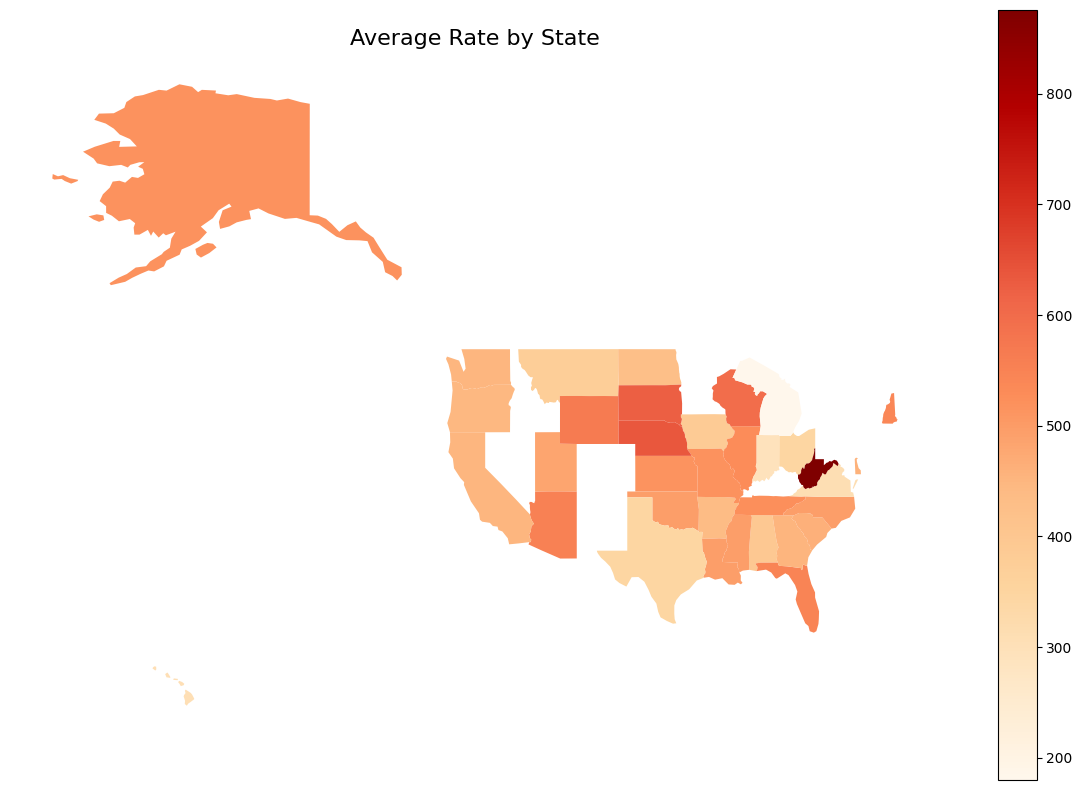

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
state_boundaries.plot(column='IndividualRate', cmap='OrRd', legend=True, ax=ax)
plt.title('Average Rate by State', fontsize=16)
plt.axis('off')
plt.show()